In [2]:
%matplotlib inline

In [171]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, LogisticRegression

# Regression Models

In [5]:
x = np.linspace(-3, 5, 10)
y = 2 * x + 3

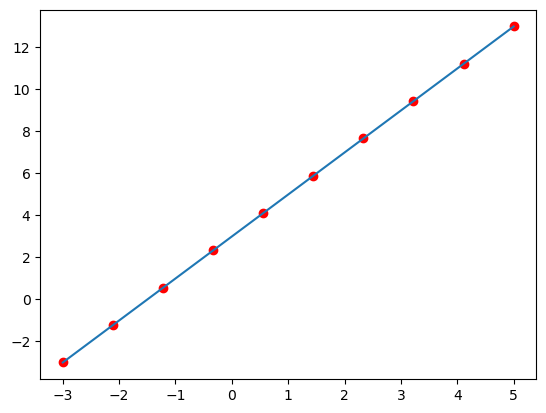

In [7]:
plt.plot(x, y) # this is the model
plt.scatter(x, y, c='r') # this is the data
plt.show()

Increasing the data and intrudicing variance $\varepsilon = np.random.normal(loc=0)$
The $loc$ is $0$ because if was different than zero, it is not random anymore and will be included in the parameter $b$

In [11]:
x = np.linspace(-3, 5, 1000)
y = 2 * x + 3

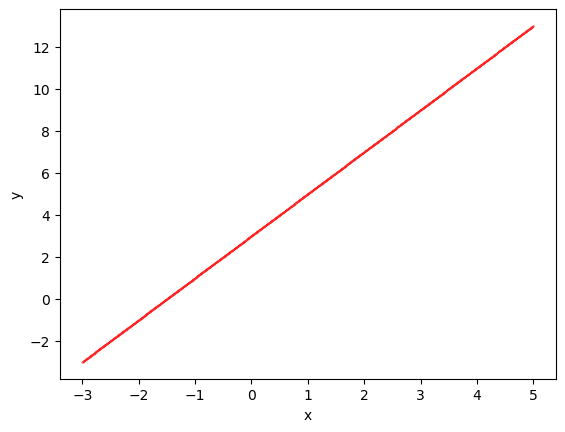

In [14]:
plt.scatter(x, y, c='r', s=0.1) # this is the data
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [30]:
y_noise = np.random.normal(loc=0, scale=0.5, size=len(x)) # variance

In [31]:
y_result = y + y_noise

Now we plot $(x, y)$ where $y$ will be accounted for the noise

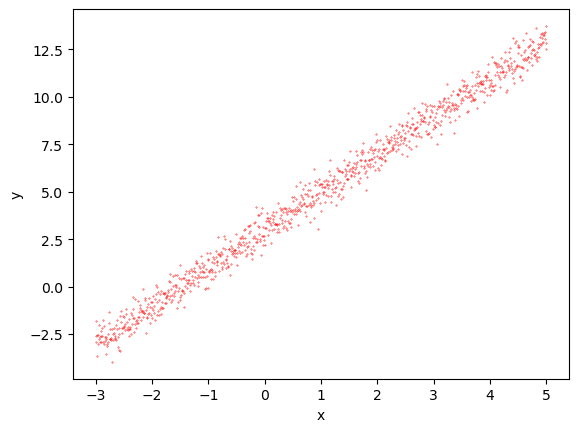

In [32]:
plt.scatter(x, y_result, c='r', s=0.1)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

We are interesting of the pattern. Reducing the standart deviation will bring the points closer together, increasing it will disperse them.

In [71]:
y = y_result # data including random error

We have data, we will attempt to create a model by identifying the $a, b$ parameters. First we assume values for $a, b$ and we test the model.

In [50]:
a = 8
b = 2

model_x = np.linspace(np.min(x), np.max(x), 5)
model_y = a * model_x + b

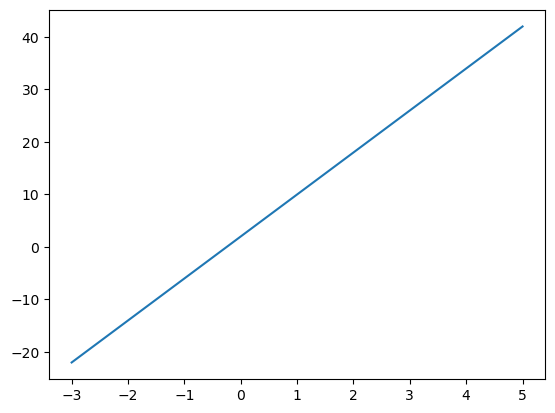

In [51]:
plt.plot(model_x, model_y)
plt.show()

No a simple look the model looks like the data. We plot them together to see if have any diffrence:

In [67]:
def plot_predictions(x, y, a, b):

    predictions = a * x + b
    
    plt.plot(x, predictions, label='Model')
    plt.scatter(x, y, c='r', s=0.1, label='Data')
    
    plt.xlabel('x')
    plt.ylabel('y')

    plt.title('Model against expected data')
    plt.legend()
    plt.show()

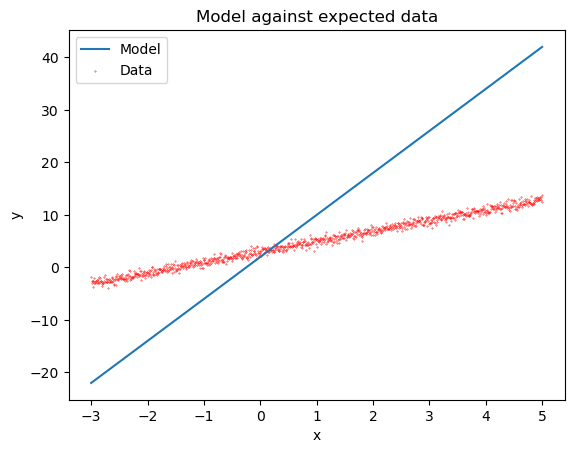

In [68]:
plot_predictions(x, y, 8, 2)

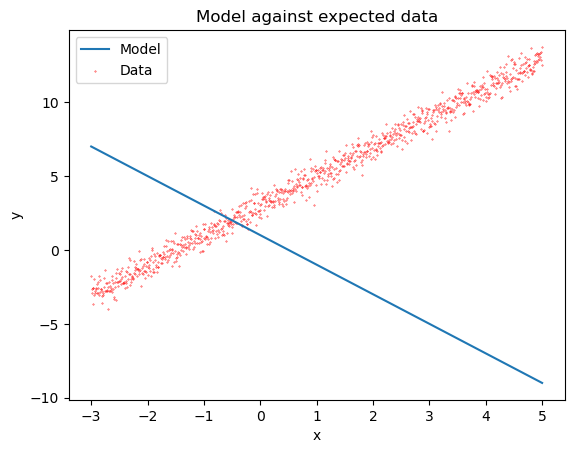

In [69]:
plot_predictions(x, y, -2, 1)

We have a method to deteermine how 'close' is a modeling to the expected data. We know what our model should look like when passing $a, b$ and see what fits best

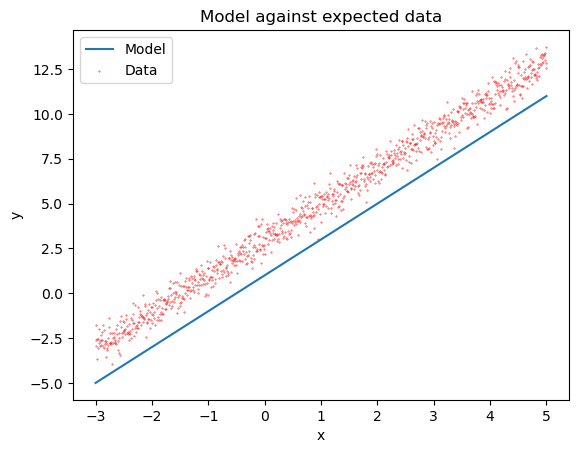

In [72]:
plot_predictions(x, y, 2, 1)

We see that some models are better than others. This has systematic error. The previous is very bad. Idea is we can make conclusions. We must find a way to determin the model which passes through all lines as close as possible, The distance from the point to the line is what should be minimum. However, to facilitate the computing, we use the $y$ distance from the point to the $y$. So we dont care what are the values of the distance, we are interested in when is the distance minimum. The function is monoton. 

In [89]:
def compute_distances_mae(x, y, a, b):
    prediction = a * x + b
    distances = np.abs(y - prediction)
    total_distance = np.mean(distances) # mean absolute error MAE
    return total_distance

In [86]:
compute_distances(x, y, -2, 1)

9.137317880021435

In [87]:
compute_distances(x, y, 2, 1)

1.9885510810287892

In [88]:
compute_distances(x, y, 8, 2)

12.5425957298828

In [90]:
def compute_distances_mse(x, y, a, b):
    """ this is also solution """
    prediction = a * x + b
    distances = (y - prediction) ** 2
    total_distance = np.mean(distances) # mean squared error MSE
    return total_distance

Both error methoda are valid and provide information how far our model is from the points

In [99]:
def compute_gradient(x, y, a, b):
    prediction = a * x + b
    a_gradient = -2 / len(x) * np.sum(x * (y - prediction))
    b_gradient = -2 / len(x) * np.sum(y - prediction)
    return np.array([a_gradient, b_gradient])

In [97]:
compute_gradient(x, y, 5, 1)

(34.120841328338614, 2.0228978379424216)

So we received the gradient and respectively the $a$ and $b$ parameters corrections. We need to correct the params and pass them to the algorithm for next iteration. However, the vvalues are too large and the steps will be too large. So we reduce the output with a certain coef, like 100 times and we correct $a$ and $b$ with those new corrections. The coef is called **learning rate**

In [100]:
0.01 * compute_gradient(x, y, 5, 1)

array([0.34120841, 0.02022898])

Now the values are small enough to correct $a$ and $b$ :

In [103]:
a, b = 5, 1
learning_rate = 0.01
a = a - learning_rate * compute_gradient(x, y, a, b)[0]
b = b - learning_rate * compute_gradient(x, y, a, b)[1]

In [104]:
a, b

(4.658791586716614, 0.9797710216205758)

In [106]:
compute_distances_mse(x, y, a, b)

38.554968457723156

In [125]:
def iterative_approach(n, x, y, a, b):
    for step in range(n + 1):
        result = compute_distances_mse(x, y, a, b)
        a = a - learning_rate * compute_gradient(x, y, a, b)[0]
        b = b - learning_rate * compute_gradient(x, y, a, b)[1]
    return result, a, b

In [151]:
result = iterative_approach(1000, x, y, 5, 1)
print(result)

(0.26458704472928624, 1.9968301773435475, 2.991720779255421)


In [152]:
a, b = result[1], result[2]

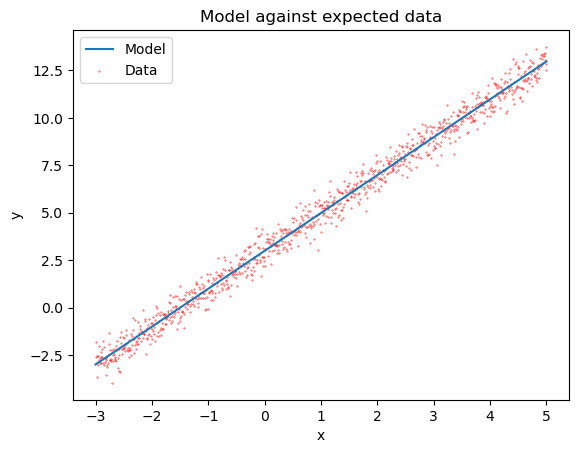

In [153]:
plot_predictions(x, y, a, b)

In [157]:
model = LinearRegression()
model.fit(x, y)

ValueError: Expected 2D array, got 1D array instead:
array=[-3.00000000e+00 -2.99199199e+00 -2.98398398e+00 -2.97597598e+00
 -2.96796797e+00 -2.95995996e+00 -2.95195195e+00 -2.94394394e+00
 -2.93593594e+00 -2.92792793e+00 -2.91991992e+00 -2.91191191e+00
 -2.90390390e+00 -2.89589590e+00 -2.88788789e+00 -2.87987988e+00
 -2.87187187e+00 -2.86386386e+00 -2.85585586e+00 -2.84784785e+00
 -2.83983984e+00 -2.83183183e+00 -2.82382382e+00 -2.81581582e+00
 -2.80780781e+00 -2.79979980e+00 -2.79179179e+00 -2.78378378e+00
 -2.77577578e+00 -2.76776777e+00 -2.75975976e+00 -2.75175175e+00
 -2.74374374e+00 -2.73573574e+00 -2.72772773e+00 -2.71971972e+00
 -2.71171171e+00 -2.70370370e+00 -2.69569570e+00 -2.68768769e+00
 -2.67967968e+00 -2.67167167e+00 -2.66366366e+00 -2.65565566e+00
 -2.64764765e+00 -2.63963964e+00 -2.63163163e+00 -2.62362362e+00
 -2.61561562e+00 -2.60760761e+00 -2.59959960e+00 -2.59159159e+00
 -2.58358358e+00 -2.57557558e+00 -2.56756757e+00 -2.55955956e+00
 -2.55155155e+00 -2.54354354e+00 -2.53553554e+00 -2.52752753e+00
 -2.51951952e+00 -2.51151151e+00 -2.50350350e+00 -2.49549550e+00
 -2.48748749e+00 -2.47947948e+00 -2.47147147e+00 -2.46346346e+00
 -2.45545546e+00 -2.44744745e+00 -2.43943944e+00 -2.43143143e+00
 -2.42342342e+00 -2.41541542e+00 -2.40740741e+00 -2.39939940e+00
 -2.39139139e+00 -2.38338338e+00 -2.37537538e+00 -2.36736737e+00
 -2.35935936e+00 -2.35135135e+00 -2.34334334e+00 -2.33533534e+00
 -2.32732733e+00 -2.31931932e+00 -2.31131131e+00 -2.30330330e+00
 -2.29529530e+00 -2.28728729e+00 -2.27927928e+00 -2.27127127e+00
 -2.26326326e+00 -2.25525526e+00 -2.24724725e+00 -2.23923924e+00
 -2.23123123e+00 -2.22322322e+00 -2.21521522e+00 -2.20720721e+00
 -2.19919920e+00 -2.19119119e+00 -2.18318318e+00 -2.17517518e+00
 -2.16716717e+00 -2.15915916e+00 -2.15115115e+00 -2.14314314e+00
 -2.13513514e+00 -2.12712713e+00 -2.11911912e+00 -2.11111111e+00
 -2.10310310e+00 -2.09509510e+00 -2.08708709e+00 -2.07907908e+00
 -2.07107107e+00 -2.06306306e+00 -2.05505506e+00 -2.04704705e+00
 -2.03903904e+00 -2.03103103e+00 -2.02302302e+00 -2.01501502e+00
 -2.00700701e+00 -1.99899900e+00 -1.99099099e+00 -1.98298298e+00
 -1.97497497e+00 -1.96696697e+00 -1.95895896e+00 -1.95095095e+00
 -1.94294294e+00 -1.93493493e+00 -1.92692693e+00 -1.91891892e+00
 -1.91091091e+00 -1.90290290e+00 -1.89489489e+00 -1.88688689e+00
 -1.87887888e+00 -1.87087087e+00 -1.86286286e+00 -1.85485485e+00
 -1.84684685e+00 -1.83883884e+00 -1.83083083e+00 -1.82282282e+00
 -1.81481481e+00 -1.80680681e+00 -1.79879880e+00 -1.79079079e+00
 -1.78278278e+00 -1.77477477e+00 -1.76676677e+00 -1.75875876e+00
 -1.75075075e+00 -1.74274274e+00 -1.73473473e+00 -1.72672673e+00
 -1.71871872e+00 -1.71071071e+00 -1.70270270e+00 -1.69469469e+00
 -1.68668669e+00 -1.67867868e+00 -1.67067067e+00 -1.66266266e+00
 -1.65465465e+00 -1.64664665e+00 -1.63863864e+00 -1.63063063e+00
 -1.62262262e+00 -1.61461461e+00 -1.60660661e+00 -1.59859860e+00
 -1.59059059e+00 -1.58258258e+00 -1.57457457e+00 -1.56656657e+00
 -1.55855856e+00 -1.55055055e+00 -1.54254254e+00 -1.53453453e+00
 -1.52652653e+00 -1.51851852e+00 -1.51051051e+00 -1.50250250e+00
 -1.49449449e+00 -1.48648649e+00 -1.47847848e+00 -1.47047047e+00
 -1.46246246e+00 -1.45445445e+00 -1.44644645e+00 -1.43843844e+00
 -1.43043043e+00 -1.42242242e+00 -1.41441441e+00 -1.40640641e+00
 -1.39839840e+00 -1.39039039e+00 -1.38238238e+00 -1.37437437e+00
 -1.36636637e+00 -1.35835836e+00 -1.35035035e+00 -1.34234234e+00
 -1.33433433e+00 -1.32632633e+00 -1.31831832e+00 -1.31031031e+00
 -1.30230230e+00 -1.29429429e+00 -1.28628629e+00 -1.27827828e+00
 -1.27027027e+00 -1.26226226e+00 -1.25425425e+00 -1.24624625e+00
 -1.23823824e+00 -1.23023023e+00 -1.22222222e+00 -1.21421421e+00
 -1.20620621e+00 -1.19819820e+00 -1.19019019e+00 -1.18218218e+00
 -1.17417417e+00 -1.16616617e+00 -1.15815816e+00 -1.15015015e+00
 -1.14214214e+00 -1.13413413e+00 -1.12612613e+00 -1.11811812e+00
 -1.11011011e+00 -1.10210210e+00 -1.09409409e+00 -1.08608609e+00
 -1.07807808e+00 -1.07007007e+00 -1.06206206e+00 -1.05405405e+00
 -1.04604605e+00 -1.03803804e+00 -1.03003003e+00 -1.02202202e+00
 -1.01401401e+00 -1.00600601e+00 -9.97997998e-01 -9.89989990e-01
 -9.81981982e-01 -9.73973974e-01 -9.65965966e-01 -9.57957958e-01
 -9.49949950e-01 -9.41941942e-01 -9.33933934e-01 -9.25925926e-01
 -9.17917918e-01 -9.09909910e-01 -9.01901902e-01 -8.93893894e-01
 -8.85885886e-01 -8.77877878e-01 -8.69869870e-01 -8.61861862e-01
 -8.53853854e-01 -8.45845846e-01 -8.37837838e-01 -8.29829830e-01
 -8.21821822e-01 -8.13813814e-01 -8.05805806e-01 -7.97797798e-01
 -7.89789790e-01 -7.81781782e-01 -7.73773774e-01 -7.65765766e-01
 -7.57757758e-01 -7.49749750e-01 -7.41741742e-01 -7.33733734e-01
 -7.25725726e-01 -7.17717718e-01 -7.09709710e-01 -7.01701702e-01
 -6.93693694e-01 -6.85685686e-01 -6.77677678e-01 -6.69669670e-01
 -6.61661662e-01 -6.53653654e-01 -6.45645646e-01 -6.37637638e-01
 -6.29629630e-01 -6.21621622e-01 -6.13613614e-01 -6.05605606e-01
 -5.97597598e-01 -5.89589590e-01 -5.81581582e-01 -5.73573574e-01
 -5.65565566e-01 -5.57557558e-01 -5.49549550e-01 -5.41541542e-01
 -5.33533534e-01 -5.25525526e-01 -5.17517518e-01 -5.09509510e-01
 -5.01501502e-01 -4.93493493e-01 -4.85485485e-01 -4.77477477e-01
 -4.69469469e-01 -4.61461461e-01 -4.53453453e-01 -4.45445445e-01
 -4.37437437e-01 -4.29429429e-01 -4.21421421e-01 -4.13413413e-01
 -4.05405405e-01 -3.97397397e-01 -3.89389389e-01 -3.81381381e-01
 -3.73373373e-01 -3.65365365e-01 -3.57357357e-01 -3.49349349e-01
 -3.41341341e-01 -3.33333333e-01 -3.25325325e-01 -3.17317317e-01
 -3.09309309e-01 -3.01301301e-01 -2.93293293e-01 -2.85285285e-01
 -2.77277277e-01 -2.69269269e-01 -2.61261261e-01 -2.53253253e-01
 -2.45245245e-01 -2.37237237e-01 -2.29229229e-01 -2.21221221e-01
 -2.13213213e-01 -2.05205205e-01 -1.97197197e-01 -1.89189189e-01
 -1.81181181e-01 -1.73173173e-01 -1.65165165e-01 -1.57157157e-01
 -1.49149149e-01 -1.41141141e-01 -1.33133133e-01 -1.25125125e-01
 -1.17117117e-01 -1.09109109e-01 -1.01101101e-01 -9.30930931e-02
 -8.50850851e-02 -7.70770771e-02 -6.90690691e-02 -6.10610611e-02
 -5.30530531e-02 -4.50450450e-02 -3.70370370e-02 -2.90290290e-02
 -2.10210210e-02 -1.30130130e-02 -5.00500501e-03  3.00300300e-03
  1.10110110e-02  1.90190190e-02  2.70270270e-02  3.50350350e-02
  4.30430430e-02  5.10510511e-02  5.90590591e-02  6.70670671e-02
  7.50750751e-02  8.30830831e-02  9.10910911e-02  9.90990991e-02
  1.07107107e-01  1.15115115e-01  1.23123123e-01  1.31131131e-01
  1.39139139e-01  1.47147147e-01  1.55155155e-01  1.63163163e-01
  1.71171171e-01  1.79179179e-01  1.87187187e-01  1.95195195e-01
  2.03203203e-01  2.11211211e-01  2.19219219e-01  2.27227227e-01
  2.35235235e-01  2.43243243e-01  2.51251251e-01  2.59259259e-01
  2.67267267e-01  2.75275275e-01  2.83283283e-01  2.91291291e-01
  2.99299299e-01  3.07307307e-01  3.15315315e-01  3.23323323e-01
  3.31331331e-01  3.39339339e-01  3.47347347e-01  3.55355355e-01
  3.63363363e-01  3.71371371e-01  3.79379379e-01  3.87387387e-01
  3.95395395e-01  4.03403403e-01  4.11411411e-01  4.19419419e-01
  4.27427427e-01  4.35435435e-01  4.43443443e-01  4.51451451e-01
  4.59459459e-01  4.67467467e-01  4.75475475e-01  4.83483483e-01
  4.91491491e-01  4.99499499e-01  5.07507508e-01  5.15515516e-01
  5.23523524e-01  5.31531532e-01  5.39539540e-01  5.47547548e-01
  5.55555556e-01  5.63563564e-01  5.71571572e-01  5.79579580e-01
  5.87587588e-01  5.95595596e-01  6.03603604e-01  6.11611612e-01
  6.19619620e-01  6.27627628e-01  6.35635636e-01  6.43643644e-01
  6.51651652e-01  6.59659660e-01  6.67667668e-01  6.75675676e-01
  6.83683684e-01  6.91691692e-01  6.99699700e-01  7.07707708e-01
  7.15715716e-01  7.23723724e-01  7.31731732e-01  7.39739740e-01
  7.47747748e-01  7.55755756e-01  7.63763764e-01  7.71771772e-01
  7.79779780e-01  7.87787788e-01  7.95795796e-01  8.03803804e-01
  8.11811812e-01  8.19819820e-01  8.27827828e-01  8.35835836e-01
  8.43843844e-01  8.51851852e-01  8.59859860e-01  8.67867868e-01
  8.75875876e-01  8.83883884e-01  8.91891892e-01  8.99899900e-01
  9.07907908e-01  9.15915916e-01  9.23923924e-01  9.31931932e-01
  9.39939940e-01  9.47947948e-01  9.55955956e-01  9.63963964e-01
  9.71971972e-01  9.79979980e-01  9.87987988e-01  9.95995996e-01
  1.00400400e+00  1.01201201e+00  1.02002002e+00  1.02802803e+00
  1.03603604e+00  1.04404404e+00  1.05205205e+00  1.06006006e+00
  1.06806807e+00  1.07607608e+00  1.08408408e+00  1.09209209e+00
  1.10010010e+00  1.10810811e+00  1.11611612e+00  1.12412412e+00
  1.13213213e+00  1.14014014e+00  1.14814815e+00  1.15615616e+00
  1.16416416e+00  1.17217217e+00  1.18018018e+00  1.18818819e+00
  1.19619620e+00  1.20420420e+00  1.21221221e+00  1.22022022e+00
  1.22822823e+00  1.23623624e+00  1.24424424e+00  1.25225225e+00
  1.26026026e+00  1.26826827e+00  1.27627628e+00  1.28428428e+00
  1.29229229e+00  1.30030030e+00  1.30830831e+00  1.31631632e+00
  1.32432432e+00  1.33233233e+00  1.34034034e+00  1.34834835e+00
  1.35635636e+00  1.36436436e+00  1.37237237e+00  1.38038038e+00
  1.38838839e+00  1.39639640e+00  1.40440440e+00  1.41241241e+00
  1.42042042e+00  1.42842843e+00  1.43643644e+00  1.44444444e+00
  1.45245245e+00  1.46046046e+00  1.46846847e+00  1.47647648e+00
  1.48448448e+00  1.49249249e+00  1.50050050e+00  1.50850851e+00
  1.51651652e+00  1.52452452e+00  1.53253253e+00  1.54054054e+00
  1.54854855e+00  1.55655656e+00  1.56456456e+00  1.57257257e+00
  1.58058058e+00  1.58858859e+00  1.59659660e+00  1.60460460e+00
  1.61261261e+00  1.62062062e+00  1.62862863e+00  1.63663664e+00
  1.64464464e+00  1.65265265e+00  1.66066066e+00  1.66866867e+00
  1.67667668e+00  1.68468468e+00  1.69269269e+00  1.70070070e+00
  1.70870871e+00  1.71671672e+00  1.72472472e+00  1.73273273e+00
  1.74074074e+00  1.74874875e+00  1.75675676e+00  1.76476476e+00
  1.77277277e+00  1.78078078e+00  1.78878879e+00  1.79679680e+00
  1.80480480e+00  1.81281281e+00  1.82082082e+00  1.82882883e+00
  1.83683684e+00  1.84484484e+00  1.85285285e+00  1.86086086e+00
  1.86886887e+00  1.87687688e+00  1.88488488e+00  1.89289289e+00
  1.90090090e+00  1.90890891e+00  1.91691692e+00  1.92492492e+00
  1.93293293e+00  1.94094094e+00  1.94894895e+00  1.95695696e+00
  1.96496496e+00  1.97297297e+00  1.98098098e+00  1.98898899e+00
  1.99699700e+00  2.00500501e+00  2.01301301e+00  2.02102102e+00
  2.02902903e+00  2.03703704e+00  2.04504505e+00  2.05305305e+00
  2.06106106e+00  2.06906907e+00  2.07707708e+00  2.08508509e+00
  2.09309309e+00  2.10110110e+00  2.10910911e+00  2.11711712e+00
  2.12512513e+00  2.13313313e+00  2.14114114e+00  2.14914915e+00
  2.15715716e+00  2.16516517e+00  2.17317317e+00  2.18118118e+00
  2.18918919e+00  2.19719720e+00  2.20520521e+00  2.21321321e+00
  2.22122122e+00  2.22922923e+00  2.23723724e+00  2.24524525e+00
  2.25325325e+00  2.26126126e+00  2.26926927e+00  2.27727728e+00
  2.28528529e+00  2.29329329e+00  2.30130130e+00  2.30930931e+00
  2.31731732e+00  2.32532533e+00  2.33333333e+00  2.34134134e+00
  2.34934935e+00  2.35735736e+00  2.36536537e+00  2.37337337e+00
  2.38138138e+00  2.38938939e+00  2.39739740e+00  2.40540541e+00
  2.41341341e+00  2.42142142e+00  2.42942943e+00  2.43743744e+00
  2.44544545e+00  2.45345345e+00  2.46146146e+00  2.46946947e+00
  2.47747748e+00  2.48548549e+00  2.49349349e+00  2.50150150e+00
  2.50950951e+00  2.51751752e+00  2.52552553e+00  2.53353353e+00
  2.54154154e+00  2.54954955e+00  2.55755756e+00  2.56556557e+00
  2.57357357e+00  2.58158158e+00  2.58958959e+00  2.59759760e+00
  2.60560561e+00  2.61361361e+00  2.62162162e+00  2.62962963e+00
  2.63763764e+00  2.64564565e+00  2.65365365e+00  2.66166166e+00
  2.66966967e+00  2.67767768e+00  2.68568569e+00  2.69369369e+00
  2.70170170e+00  2.70970971e+00  2.71771772e+00  2.72572573e+00
  2.73373373e+00  2.74174174e+00  2.74974975e+00  2.75775776e+00
  2.76576577e+00  2.77377377e+00  2.78178178e+00  2.78978979e+00
  2.79779780e+00  2.80580581e+00  2.81381381e+00  2.82182182e+00
  2.82982983e+00  2.83783784e+00  2.84584585e+00  2.85385385e+00
  2.86186186e+00  2.86986987e+00  2.87787788e+00  2.88588589e+00
  2.89389389e+00  2.90190190e+00  2.90990991e+00  2.91791792e+00
  2.92592593e+00  2.93393393e+00  2.94194194e+00  2.94994995e+00
  2.95795796e+00  2.96596597e+00  2.97397397e+00  2.98198198e+00
  2.98998999e+00  2.99799800e+00  3.00600601e+00  3.01401401e+00
  3.02202202e+00  3.03003003e+00  3.03803804e+00  3.04604605e+00
  3.05405405e+00  3.06206206e+00  3.07007007e+00  3.07807808e+00
  3.08608609e+00  3.09409409e+00  3.10210210e+00  3.11011011e+00
  3.11811812e+00  3.12612613e+00  3.13413413e+00  3.14214214e+00
  3.15015015e+00  3.15815816e+00  3.16616617e+00  3.17417417e+00
  3.18218218e+00  3.19019019e+00  3.19819820e+00  3.20620621e+00
  3.21421421e+00  3.22222222e+00  3.23023023e+00  3.23823824e+00
  3.24624625e+00  3.25425425e+00  3.26226226e+00  3.27027027e+00
  3.27827828e+00  3.28628629e+00  3.29429429e+00  3.30230230e+00
  3.31031031e+00  3.31831832e+00  3.32632633e+00  3.33433433e+00
  3.34234234e+00  3.35035035e+00  3.35835836e+00  3.36636637e+00
  3.37437437e+00  3.38238238e+00  3.39039039e+00  3.39839840e+00
  3.40640641e+00  3.41441441e+00  3.42242242e+00  3.43043043e+00
  3.43843844e+00  3.44644645e+00  3.45445445e+00  3.46246246e+00
  3.47047047e+00  3.47847848e+00  3.48648649e+00  3.49449449e+00
  3.50250250e+00  3.51051051e+00  3.51851852e+00  3.52652653e+00
  3.53453453e+00  3.54254254e+00  3.55055055e+00  3.55855856e+00
  3.56656657e+00  3.57457457e+00  3.58258258e+00  3.59059059e+00
  3.59859860e+00  3.60660661e+00  3.61461461e+00  3.62262262e+00
  3.63063063e+00  3.63863864e+00  3.64664665e+00  3.65465465e+00
  3.66266266e+00  3.67067067e+00  3.67867868e+00  3.68668669e+00
  3.69469469e+00  3.70270270e+00  3.71071071e+00  3.71871872e+00
  3.72672673e+00  3.73473473e+00  3.74274274e+00  3.75075075e+00
  3.75875876e+00  3.76676677e+00  3.77477477e+00  3.78278278e+00
  3.79079079e+00  3.79879880e+00  3.80680681e+00  3.81481481e+00
  3.82282282e+00  3.83083083e+00  3.83883884e+00  3.84684685e+00
  3.85485485e+00  3.86286286e+00  3.87087087e+00  3.87887888e+00
  3.88688689e+00  3.89489489e+00  3.90290290e+00  3.91091091e+00
  3.91891892e+00  3.92692693e+00  3.93493493e+00  3.94294294e+00
  3.95095095e+00  3.95895896e+00  3.96696697e+00  3.97497497e+00
  3.98298298e+00  3.99099099e+00  3.99899900e+00  4.00700701e+00
  4.01501502e+00  4.02302302e+00  4.03103103e+00  4.03903904e+00
  4.04704705e+00  4.05505506e+00  4.06306306e+00  4.07107107e+00
  4.07907908e+00  4.08708709e+00  4.09509510e+00  4.10310310e+00
  4.11111111e+00  4.11911912e+00  4.12712713e+00  4.13513514e+00
  4.14314314e+00  4.15115115e+00  4.15915916e+00  4.16716717e+00
  4.17517518e+00  4.18318318e+00  4.19119119e+00  4.19919920e+00
  4.20720721e+00  4.21521522e+00  4.22322322e+00  4.23123123e+00
  4.23923924e+00  4.24724725e+00  4.25525526e+00  4.26326326e+00
  4.27127127e+00  4.27927928e+00  4.28728729e+00  4.29529530e+00
  4.30330330e+00  4.31131131e+00  4.31931932e+00  4.32732733e+00
  4.33533534e+00  4.34334334e+00  4.35135135e+00  4.35935936e+00
  4.36736737e+00  4.37537538e+00  4.38338338e+00  4.39139139e+00
  4.39939940e+00  4.40740741e+00  4.41541542e+00  4.42342342e+00
  4.43143143e+00  4.43943944e+00  4.44744745e+00  4.45545546e+00
  4.46346346e+00  4.47147147e+00  4.47947948e+00  4.48748749e+00
  4.49549550e+00  4.50350350e+00  4.51151151e+00  4.51951952e+00
  4.52752753e+00  4.53553554e+00  4.54354354e+00  4.55155155e+00
  4.55955956e+00  4.56756757e+00  4.57557558e+00  4.58358358e+00
  4.59159159e+00  4.59959960e+00  4.60760761e+00  4.61561562e+00
  4.62362362e+00  4.63163163e+00  4.63963964e+00  4.64764765e+00
  4.65565566e+00  4.66366366e+00  4.67167167e+00  4.67967968e+00
  4.68768769e+00  4.69569570e+00  4.70370370e+00  4.71171171e+00
  4.71971972e+00  4.72772773e+00  4.73573574e+00  4.74374374e+00
  4.75175175e+00  4.75975976e+00  4.76776777e+00  4.77577578e+00
  4.78378378e+00  4.79179179e+00  4.79979980e+00  4.80780781e+00
  4.81581582e+00  4.82382382e+00  4.83183183e+00  4.83983984e+00
  4.84784785e+00  4.85585586e+00  4.86386386e+00  4.87187187e+00
  4.87987988e+00  4.88788789e+00  4.89589590e+00  4.90390390e+00
  4.91191191e+00  4.91991992e+00  4.92792793e+00  4.93593594e+00
  4.94394394e+00  4.95195195e+00  4.95995996e+00  4.96796797e+00
  4.97597598e+00  4.98398398e+00  4.99199199e+00  5.00000000e+00].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [159]:
x = x.reshape(-1, 1)

In [160]:
model.fit(x, y)

LinearRegression()

In [162]:
model.coef_

array([1.99683015])

In [163]:
model.intercept_

2.991720931201039

In [164]:
a, b

(1.9968301773435475, 2.991720779255421)

In [165]:
model.predict(x)

array([-2.99876952e+00, -2.98277889e+00, -2.96678825e+00, -2.95079762e+00,
       -2.93480699e+00, -2.91881636e+00, -2.90282573e+00, -2.88683510e+00,
       -2.87084446e+00, -2.85485383e+00, -2.83886320e+00, -2.82287257e+00,
       -2.80688194e+00, -2.79089130e+00, -2.77490067e+00, -2.75891004e+00,
       -2.74291941e+00, -2.72692878e+00, -2.71093815e+00, -2.69494751e+00,
       -2.67895688e+00, -2.66296625e+00, -2.64697562e+00, -2.63098499e+00,
       -2.61499435e+00, -2.59900372e+00, -2.58301309e+00, -2.56702246e+00,
       -2.55103183e+00, -2.53504120e+00, -2.51905056e+00, -2.50305993e+00,
       -2.48706930e+00, -2.47107867e+00, -2.45508804e+00, -2.43909740e+00,
       -2.42310677e+00, -2.40711614e+00, -2.39112551e+00, -2.37513488e+00,
       -2.35914425e+00, -2.34315361e+00, -2.32716298e+00, -2.31117235e+00,
       -2.29518172e+00, -2.27919109e+00, -2.26320045e+00, -2.24720982e+00,
       -2.23121919e+00, -2.21522856e+00, -2.19923793e+00, -2.18324729e+00,
       -2.16725666e+00, -

### Logistic Regression

In [169]:
def sigmoid(x):
    return 1 / (1 + np.ext(-x))

In [173]:
y = sigmoid(a * x + b)

AttributeError: module 'numpy' has no attribute 'ext'

In [185]:
x = np.linspace(-5, 5, 20)
y = (x >= 3).astype(int)

In [176]:
classifyer = LogisticRegression()

In [186]:
classifyer.fit(x.reshape(-1, 1), y)

LogisticRegression()

In [187]:
classifyer.predict(x.reshape(-1, 1))

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1])